# Floating rate bond plots

Plots several specification of the model without runs, with runs, with short short and long bonds and with the associated floating rate bond. 

In [1]:
import Pkg; Pkg.activate(joinpath(@__DIR__, ".."))
using LTBonds
using Random 
using Plots
using PrettyTables
using LaTeXStrings 

  Activating environment at `~/Github/floating-rate-debt/Project.toml`


In [2]:
SAVE_FIGS = false; # set to true to save the figures to files. 

In [3]:
# the floating rate model:
mFR = let
    R = 1.01
    β = 0.9540232420
    pref = Preferences(β = β, u = make_CRRA(ra = 2))
    y = discretize(YProcess(n = 50, ρ = 0.948503, std = 0.027092, μ = 0.0, span = 3.0, tails = false))
    m = MTruncatedNormal(; std = 0.01, span = 2.0, quadN = 100)
    penalty = DefCosts(pen1 = -0.1881927550, pen2 = 0.2455843389, quadratic = true, reentry = 0.0385)
    bond = FloatingRateBond(;n = 350, min = 0.0, max = 1.5, λ = 0.05, κbar = 1.0)  
    fr = CKLTBondModel(
        y = y,
        m = m, 
        preferences = pref, 
        bond = bond, 
        def_costs = penalty, 
        R = R,
        η = 0.1
    )   
    generate_workspace(fr)
end;

In [4]:
mEGLT, mCKLT = let
    R = 1.01
    β = 0.9540232420
    pref = Preferences(β = β, u = make_CRRA(ra = 2))
    y = discretize(YProcess(n = 50, ρ = 0.948503, std = 0.027092, μ = 0.0, span = 3.0, tails = false))
    m = MTruncatedNormal(; std = 0.01, span = 2.0, quadN = 100)
    penalty = DefCosts(pen1 = -0.1881927550, pen2 = 0.2455843389, quadratic = true, reentry = 0.0385)
    bond = Bond(n = 350, min = 0.0, max = 1.5, κ = R - 1, λ = 0.05)  

    eg = LTBondModel(
        y = y,
        m = m, 
        preferences = pref, 
        bond = bond, 
        def_costs = penalty, 
        R = R,
    )

    ck = CKLTBondModel(
        y = y,
        m = m, 
        preferences = pref, 
        bond = bond, 
        def_costs = penalty, 
        R = R,
        η = 0.1
    )

        
    (generate_workspace(eg), generate_workspace(ck))
end;

In [5]:
mEGST, mCKST = let
    R = 1.01
    β = 0.9540232420
    pref = Preferences(β = β, u = make_CRRA(ra = 2))
    y = discretize(YProcess(n = 50, ρ = 0.948503, std = 0.027092, μ = 0.0, span = 3.0, tails = false))
    m = MTruncatedNormal(; std = 0.01, span = 2.0, quadN = 100)
    penalty = DefCosts(pen1 = -0.1881927550, pen2 = 0.2455843389, quadratic = true, reentry = 0.0385)
    bond = Bond(n = 350, min = 0.0, max = 1.5, κ = R - 1, λ = 1.0)  

    eg = LTBondModel(
        y = y,
        m = m, 
        preferences = pref, 
        bond = bond, 
        def_costs = penalty, 
        R = R,
    )

    ck = CKLTBondModel(
        y = y,
        m = m, 
        preferences = pref, 
        bond = bond, 
        def_costs = penalty, 
        R = R,
        η = 0.1
    )

        
    (generate_workspace(eg), generate_workspace(ck))
end;

In [6]:
for m ∈ (mFR, mEGST, mCKST, mEGLT, mCKLT)
    @time solve!(m; print_every = 200, max_iters = 5000)
end

1: (v = 1.4304966712931169, κ = 0.99, q = 0.6091402083520817, vD = 0.5336647908767098)
201: (v = 0.5578743684363232, κ = 0.7464879959243917, q = 0.6999957288543697, vD = 0.00010840679994217339)
401: (v = 2.518262185446929e-7, κ = 1.3481842908724673e-7, q = 9.596437977599237e-9, vD = 9.789055255282619e-8)
566: (v = 9.85771464456775e-11, κ = 4.665023922711953e-11, q = 2.495115225542577e-12, vD = 4.581224288813246e-11)
Converged.
182.437595 seconds (21.47 M allocations: 1.211 GiB, 0.24% gc time, 7.63% compilation time)
1: (v = 1.503244195357336, q = 0.5809876919006187, vD = 0.5336647908767098)
201: (v = 0.00015041611272081923, q = 0.0006756621767849413, vD = 8.55392959948631e-5)
401: (v = 5.747590492433119e-8, q = 1.4828369654384943e-7, vD = 4.231429784340435e-8)
581: (v = 3.944222726204316e-11, q = 9.829714819886703e-11, vD = 2.944844368357735e-11)
Converged.
  9.863780 seconds (4.00 M allocations: 213.421 MiB, 0.56% gc time, 18.28% compilation time)
1: (v = 1.4304966712931133, q = 0.622

## Plots 

In [7]:
#set linewidth for plots:
lw = 2
ms = 3
msdiamond = 5
default(size = (600, 400), xtickfontsize = 12, ytickfontsize = 12, yguidefontsize = 14, xguidefontsize = 14)

In [8]:
###Value at zero debt plots###
#Global variables rock!
ygrid = get_y_grid(mFR)
nY = length(ygrid)
midY = nY ÷ 2
β = mFR.model.preferences.β;

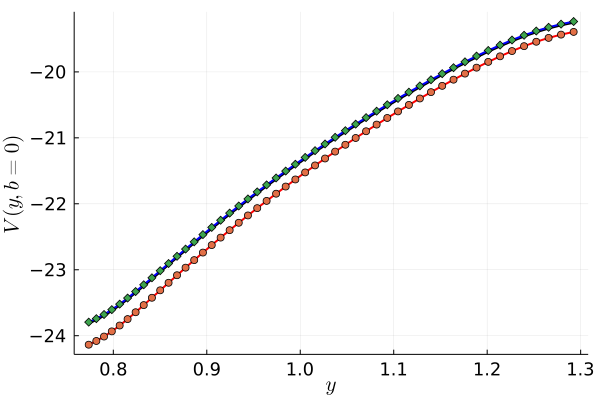

In [9]:
f = plot(ygrid, get_v(mFR)[1,:,midY], line = (lw, :black), legend = false, xlabel = (L"$y$"),
        ylabel = (L"$V(y,b=0)$"))
plot!(f, ygrid, get_v(mCKST)[1,:] , line = (lw, :red), markershape = :circle)
plot!(f, ygrid, get_v(mEGST)[1,:] , line = (lw, :blue), markershape = :diamond)
SAVE_FIGS && savefig(f, joinpath(@__DIR__, "..", "output", "V0ST.pdf"))
f

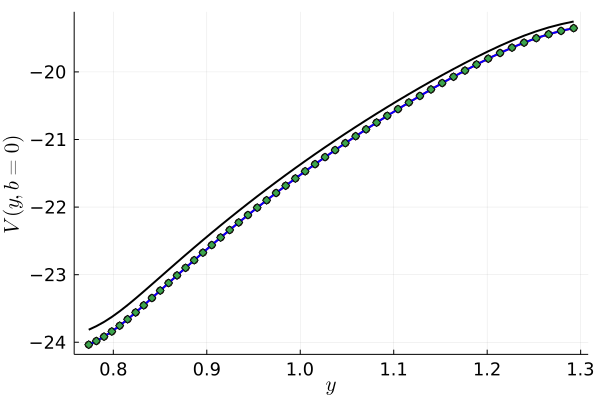

In [10]:
f = plot(ygrid, get_v(mFR)[1,:,midY], line = (lw, :black), legend=false,
        xlabel = (L"$y$"), ylabel = (L"$V(y,b=0)$"))
plot!(f, ygrid, get_v(mCKLT)[1,:] , line = (lw, :red), markershape = :circle)
plot!(f, ygrid, get_v(mEGLT)[1,:] , line = (lw, :blue), markershape = :diamond)
SAVE_FIGS && savefig(f, joinpath(@__DIR__, "..", "output", "V0LT.pdf"))
f

### Welfare

In [11]:
welfareST = [
    inv_u.(Ref(get_u(mFR)), get_v(mFR)[1, i, 1]) ./ 
    inv_u.(Ref(get_u(mCKST)), get_v(mCKST)[1,i]) for i = 1:length(-get_v(mFR)[1, :, 1])];

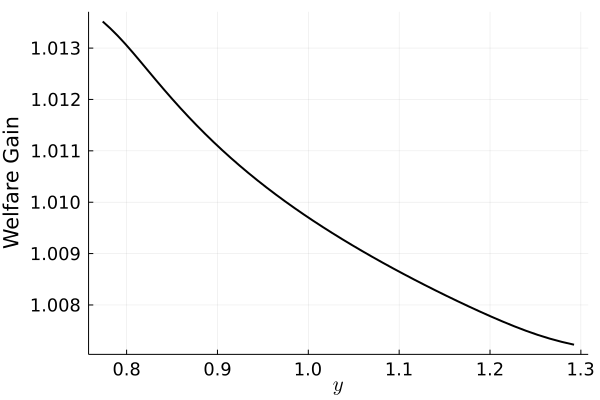

In [12]:
f = plot(ygrid, welfareST, line=(lw, :black), legend = false, xlabel = L"$y$",
        ylabel = "Welfare Gain")
SAVE_FIGS && savefig(f, joinpath(@__DIR__, "..", "output", "WST.pdf"))
f

In [13]:
welfareLT = [
    inv_u.(Ref(get_u(mFR)), get_v(mFR)[1, i, 1]) ./ 
    inv_u.(Ref(get_u(mCKLT)), get_v(mCKLT)[1,i]) for i = 1:length(-get_v(mFR)[1, :, 1])];

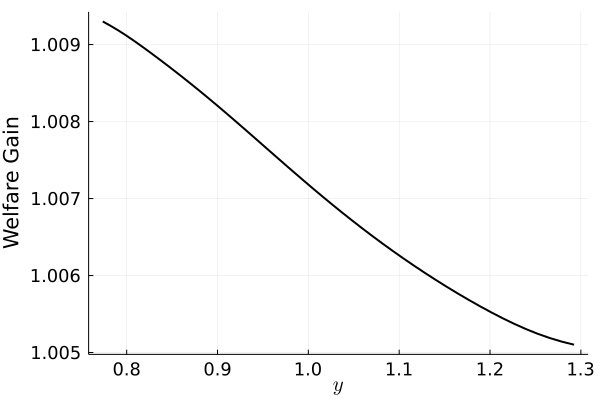

In [14]:
f = plot(ygrid, welfareLT, line = (lw, :black), legend = false, xlabel = L"$y$",
    ylabel = "Welfare Gain")
SAVE_FIGS && savefig(f, joinpath(@__DIR__, "..", "output", "WLT.pdf"))
f

## Pareto Frontiers####

In [15]:
_get_frontier_y_state(::AbstractFixedRateBond, yi, lag_y) = (yi, )
_get_frontier_y_state(::AbstractFloatingRateBond, yi, lag_y) = (yi, lag_y)
_get_frontier_κ(bond::AbstractFixedRateBond, _, _, _) = get_κ(bond)
_get_frontier_κ(::AbstractFloatingRateBond, m, bi, lag_y) = m.current.κ[bi, lag_y]
_get_frontier_mv(bond::AbstractFixedRateBond, q, b, _) = find_bond_return(bond; q) * b
_get_frontier_mv(bond::AbstractFloatingRateBond, q, b, κ) = find_bond_return(bond; q, κ) * b

_get_frontier_mv (generic function with 2 methods)

In [16]:
get_frontier(m, yi; kwargs...) = get_frontier(get_bond(m), m, yi; kwargs...)

get_frontier (generic function with 1 method)

In [17]:
function get_frontier(bond, m::LTBonds.WorkSpace, yi; lag_y = midY)
    bgrid = get_b_grid(m)
    λ = get_λ(bond)
    mv = []
    v = []
    y_state = _get_frontier_y_state(bond, yi, lag_y)
    for bi=1:length(bgrid)
        default = m.policies.d[bi, y_state...] == m.model.m.m_min
        biprime = get_b_pol(m)[bi, y_state...][end, 1].idx
        q = get_q(m)[biprime, yi]
        κ = _get_frontier_κ(bond, m, bi, lag_y)
        b = get_b_grid(m)[bi]
        push!(mv, (1 - default) * _get_frontier_mv(bond, q, b, κ))
        push!(v, (1 - default) * get_v(m)[bi, y_state...] + default * get_vD(m)[yi])
    end
    return v, mv
end

get_frontier (generic function with 2 methods)

In [18]:
frontiers = [(m, get_frontier(m,midY)...) for m in (mFR, mEGST, mCKST, mEGLT, mCKLT)];

In [19]:
markerevery(series; n = 1) = collect(view(series, 1:n:length(series)))

markerevery (generic function with 1 method)

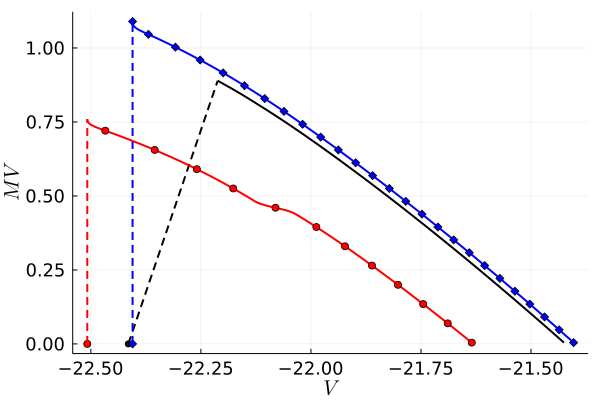

In [20]:
let 
    vD = get_vD(mFR)[midY]
    mi = 1
    xx = [x  for x in zip(frontiers[mi][2], frontiers[mi][3]) if x[1] > vD && x[2] > 0]

    f = plot([x[1] for x in xx], [x[2] for x in xx], 
        line=(lw, :black), legend=false, xlabel=(L"$V$"), ylabel=(L"MV")
    )
    plot!(f, [vD], [0], marker = 4, markercolor=:black)
    plot!(f, [vD, xx[end][1]], [0, xx[end][2]], ls = :dash,line=(lw, :black))

    vD = get_vD(mEGST)[midY]
    mi = 2
    xx = [x  for x in zip(frontiers[mi][2], frontiers[mi][3]) if x[1] > vD && x[2] > 0]
    plot!(f, [x[1] for x in xx], [x[2] for x in xx], 
        line=(lw, :blue))
    xx_f = markerevery(xx; n = 10)
    scatter!(f, [x[1] for x in xx_f], [x[2] for x in xx_f], 
        markershape=:diamond,markercolor=:blue)
    plot!(f, [vD], [0], markershape=:diamond, marker = 4,markercolor=:blue)
    plot!(f, [vD, xx[end][1]], [0, xx[end][2]], ls = :dash,line=(lw, :blue))

    vD = get_vD(mCKST)[midY]
    mi = 3
    xx = [x  for x in zip(frontiers[mi][2], frontiers[mi][3]) if x[1] > vD && x[2] > 0]
    plot!(f, [x[1] for x in xx], [x[2] for x in xx], 
        line=(lw, :red))
    xx_f = markerevery(xx; n = 15)
    scatter!(f, [x[1] for x in xx_f], [x[2] for x in xx_f], 
        markershape=:circle,markercolor=:red)
    plot!(f, [vD], [0], markershape=:circle, marker = 4,markercolor=:red)
    plot!(f, [vD, xx[end][1]], [0, xx[end][2]], ls = :dash,line=(lw, :red))

    SAVE_FIGS && savefig(f, joinpath(@__DIR__,"..","output","FrontierST.pdf"))
    f
end 

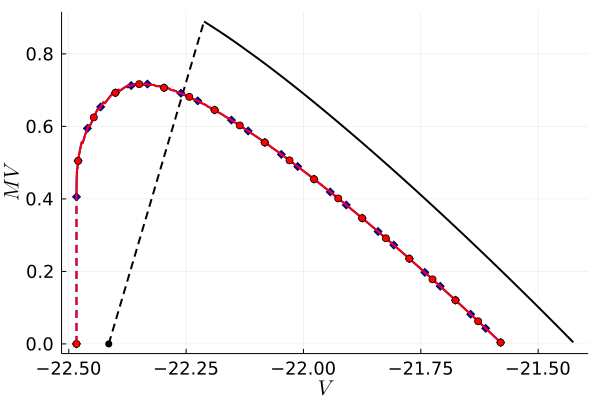

In [21]:
let 
    vD = get_vD(mFR)[midY]
    mi = 1
    xx = [x  for x in zip(frontiers[mi][2], frontiers[mi][3]) if x[1] > vD && x[2] > 0]

    f = plot([x[1] for x in xx], [x[2] for x in xx], 
        line=(lw, :black), legend=false, xlabel=(L"$V$"), ylabel=(L"MV")
    )
    plot!(f, [vD], [0], marker = 4, markercolor=:black)
    plot!(f, [vD, xx[end][1]], [0, xx[end][2]], ls = :dash,line=(lw, :black))

    vD = get_vD(mEGLT)[midY]
    mi = 4
    xx = [x  for x in zip(frontiers[mi][2], frontiers[mi][3]) if x[1] > vD && x[2] > 0]
    plot!(f, [x[1] for x in xx], [x[2] for x in xx], 
        line=(lw, :blue))
    xx_f = markerevery(xx; n = 10)
    scatter!(f, [x[1] for x in xx_f], [x[2] for x in xx_f], 
        markershape=:diamond,markercolor=:blue)
    plot!(f, [vD], [0], markershape=:diamond, marker = 4,markercolor=:blue)
    plot!(f, [vD, xx[end][1]], [0, xx[end][2]], ls = :dash,line=(lw, :blue))

    vD = get_vD(mCKLT)[midY]
    mi = 5
    xx = [x  for x in zip(frontiers[mi][2], frontiers[mi][3]) if x[1] > vD && x[2] > 0]
    plot!(f, [x[1] for x in xx], [x[2] for x in xx], 
        line=(lw, :red))
    xx_f = markerevery(xx; n = 15)
    scatter!(f, [x[1] for x in xx_f], [x[2] for x in xx_f], 
        markershape=:circle,markercolor=:red)
    plot!(f, [vD], [0], markershape=:circle, marker = 4,markercolor=:red)
    plot!(f, [vD, xx[end][1]], [0, xx[end][2]], ls = :dash,line=(lw, :red))

    SAVE_FIGS && savefig(f, joinpath(@__DIR__,"..","output","FrontierLT.pdf"))
    f
end 